# Importing some packages

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt

import torch
import torch.optim as optim
import torch.nn as nn
from torchviz import make_dot

# Creating data

In [2]:
N = 100
ERROR_SCALE = 0.1
TRUE_B = 1
TRUE_W = 2

np.random.seed(42)

X = np.random.rand(N, 1)
error = ERROR_SCALE * np.random.randn(N, 1)
y = TRUE_B + TRUE_W * X + error

Splitting into train and test sets

In [3]:
idx = np.arange(N)
np.random.shuffle(idx)

train_idx = idx[:int(N*.8)]
val_idx = idx[int(N*.8):]

X_train, y_train = X[train_idx], y[train_idx]
X_val, y_val = X[val_idx], y[val_idx]

# Gradient descent

Random parameter initialization

In [4]:
np.random.seed(42)
B = np.random.randn(1)
W = np.random.randn(1)

y_train_hat = B + W * X_train

Loss computation

In [5]:
loss = np.mean((y_train - y_train_hat)**2)
loss

2.7421577700550976

Gradient computation

In [6]:
b_grad = 2 * np.mean((y_train_hat - y_train))
w_grad = 2 * np.mean(X_train * (y_train_hat - y_train))

print(f"slope gradient = {w_grad}")
print(f"intercept gradient = {b_grad}")

slope gradient = -1.8337537171510832
intercept gradient = -3.044811379650508


Updating the parameters

In [7]:
LEARNING_RATE = 0.1

B_NEW = B - LEARNING_RATE * b_grad
W_NEW = W - LEARNING_RATE * w_grad

print(f"Initial guess: {B[0], W[0]}")
print(f"Updated parameters: {B_NEW[0], W_NEW[0]}")

Initial guess: (0.4967141530112327, -0.13826430117118466)
Updated parameters: (0.8011952909762835, 0.04511107054392366)


Training for some epochs to find the optimal parameters

In [8]:
np.random.seed(42)
intercept = np.random.randn(1)
slope = np.random.randn(1)

epochs = 1000

learning_rate = 0.1

for _ in range(epochs):

    y_train_hat = intercept + slope * X_train

    error = y_train_hat - y_train

    loss = np.mean(error ** 2)

    intercept_grad = 2 * np.mean(error)

    slope_grad = 2 * np.mean(X_train * error)

    intercept = intercept - learning_rate * intercept_grad

    slope = slope - learning_rate * slope_grad

print(f"Final intercept: {intercept[0]}")
print(f"Final slope: {slope[0]}")
print(f"Loss after {epochs} epochs: {loss}")

Final intercept: 1.02354093708
Final slope: 1.9689641135454565
Loss after 1000 epochs: 0.008044657695505499


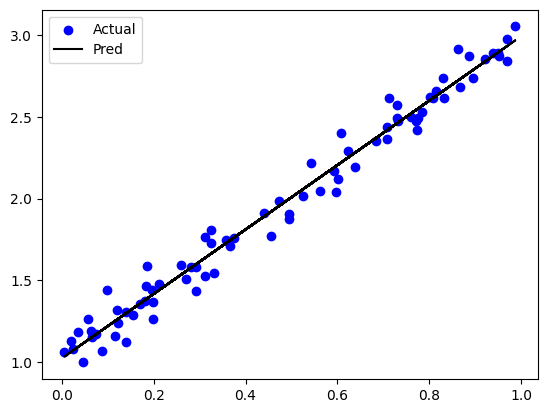

In [9]:
y_train_hat = intercept + slope * X_train

plt.scatter(X_train, y_train, label='Actual', color='blue')
plt.plot(X_train, y_train_hat, label='Pred', color='k')
plt.legend()
plt.show()

# Pytorch experiments

In [10]:
scalar = torch.tensor(1.2)
vector = torch.tensor([0.9, 5.6])
matrix = torch.ones((3, 4), dtype=torch.float)
tensor = torch.randn((3, 2, 2), dtype=torch.float)

print(scalar)
print(vector)
print(matrix)
print(tensor)

tensor(1.2000)
tensor([0.9000, 5.6000])
tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
tensor([[[-0.1232,  0.6087],
         [ 0.0351,  1.2135]],

        [[ 0.2714,  1.0817],
         [ 0.1104, -1.0932]],

        [[ 0.8371, -1.4398],
         [-1.0530, -1.0081]]])


In [11]:
print(tensor.size(), tensor.shape)

torch.Size([3, 2, 2]) torch.Size([3, 2, 2])


In [12]:
new_vector = matrix.view(-1, 1).clone().detach()
new_vector[0] = 1.2

print(matrix)
print(new_vector)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
tensor([[1.2000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000]])


# CUDA and CPU

In [13]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [14]:
print(torch.cuda.device_count())
print(torch.cuda.get_device_name())

1
NVIDIA GeForce RTX 3060 Laptop GPU


In [15]:
X_train_tensor = torch.as_tensor(X_train).float()
print(X_train.dtype, X_train_tensor.dtype)

float64 torch.float32


In [16]:
X_train_tensor = torch.tensor(X_train).float()
X_train_tensor[0] = -1000
print(X_train[0], X_train_tensor[0])

[0.77127035] tensor([-1000.])


In [17]:
X_train_tensor.numpy().dtype

dtype('float32')

In [18]:
X_train_tensor = torch.tensor(X_train).to(device)
X_train_tensor[0]

tensor([0.7713], device='cuda:0', dtype=torch.float64)

# Running the regression using Pytorch

In [19]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

X_train_tensor = torch.as_tensor(X_train).float().to(device)
X_val_tensor = torch.as_tensor(X_val).float().to(device)

print(type(X_train), type(X_train_tensor), X_train_tensor.type())

<class 'numpy.ndarray'> <class 'torch.Tensor'> torch.cuda.FloatTensor


In [20]:
type(X_train_tensor.cpu().numpy())

numpy.ndarray

In [21]:
torch.manual_seed(42)

intercept = torch.randn(1, dtype=torch.float, requires_grad=True, device=device)
slope = torch.randn(1, dtype=torch.float, requires_grad=True, device=device)

print(intercept, slope)

tensor([0.1940], device='cuda:0', requires_grad=True) tensor([0.1391], device='cuda:0', requires_grad=True)


In [22]:
y_train_tensor = torch.as_tensor(y_train).float().to(device)

y_train_tensor_hat = intercept + slope * X_train_tensor

error = y_train_tensor_hat - y_train_tensor

loss = (error ** 2).mean()

loss.backward()

In [23]:
# make_dot(y_train_tensor_hat)

In [24]:
print(intercept.grad, slope.grad)

tensor([-3.3881], device='cuda:0') tensor([-1.9439], device='cuda:0')


In [25]:
print(intercept.grad.zero_(), slope.grad.zero_())

tensor([0.], device='cuda:0') tensor([0.], device='cuda:0')


In [26]:
torch.manual_seed(42)

intercept = torch.randn(1, dtype=torch.float, requires_grad=True, device=device)
slope = torch.randn(1, dtype=torch.float, requires_grad=True, device=device)

epochs = 1000
lr = 0.1

for _ in range(epochs):

    y_train_tensor_hat = intercept + slope * X_train_tensor

    error = y_train_tensor_hat - y_train_tensor

    loss = (error ** 2).mean()

    loss.backward()

    with torch.no_grad():
        intercept -= lr * intercept.grad
        slope -= lr * slope.grad

    intercept.grad.zero_()
    slope.grad.zero_()

print(f"Intercept: {intercept}")
print(f"Slope: {slope}")

Intercept: tensor([1.0235], device='cuda:0', requires_grad=True)
Slope: tensor([1.9690], device='cuda:0', requires_grad=True)


Adding optimizer

In [27]:
torch.manual_seed(42)

intercept = torch.randn(1, dtype=torch.float, requires_grad=True, device=device)
slope = torch.randn(1, dtype=torch.float, requires_grad=True, device=device)

epochs = 1000
lr = 0.1

optimizer = optim.SGD([intercept, slope], lr=lr)

for _ in range(epochs):

    y_train_tensor_hat = intercept + slope * X_train_tensor

    error = y_train_tensor_hat - y_train_tensor

    loss = (error ** 2).mean()

    loss.backward()

    optimizer.step()

    optimizer.zero_grad()

print(f"Intercept: {intercept}")
print(f"Slope: {slope}")

Intercept: tensor([1.0235], device='cuda:0', requires_grad=True)
Slope: tensor([1.9690], device='cuda:0', requires_grad=True)


Adding the loss from nn

In [28]:
torch.manual_seed(42)

intercept = torch.randn(1, dtype=torch.float, requires_grad=True, device=device)
slope = torch.randn(1, dtype=torch.float, requires_grad=True, device=device)

epochs = 1000
lr = 0.1

loss_fn = nn.MSELoss(reduction='mean')

optimizer = optim.SGD([intercept, slope], lr=lr)

for _ in range(epochs):

    y_train_tensor_hat = intercept + slope * X_train_tensor

    loss = loss_fn(y_train_tensor_hat, y_train_tensor)

    loss.backward()

    optimizer.step()

    optimizer.zero_grad()

print(f"Intercept: {intercept}")
print(f"Slope: {slope}")

Intercept: tensor([1.0235], device='cuda:0', requires_grad=True)
Slope: tensor([1.9690], device='cuda:0', requires_grad=True)


In [29]:
loss.detach().cpu().numpy()

array(0.00804466, dtype=float32)

In [30]:
print(loss.item(), loss.tolist())

0.008044655434787273 0.008044655434787273


Creating a model class

In [33]:
class CustomLR(nn.Module):

    def __init__(self):
        super().__init__()
        self.intercept = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.slope = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

    def forward(self, x):
        return self.intercept + self.slope * x

In [36]:
torch.manual_seed(42)

model = CustomLR()
list(model.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [37]:
model.state_dict()

OrderedDict([('intercept', tensor([0.3367])), ('slope', tensor([0.1288]))])

In [38]:
optimizer.state_dict()

{'state': {0: {'momentum_buffer': None}, 1: {'momentum_buffer': None}},
 'param_groups': [{'lr': 0.1,
   'momentum': 0,
   'dampening': 0,
   'weight_decay': 0,
   'nesterov': False,
   'maximize': False,
   'foreach': None,
   'differentiable': False,
   'params': [0, 1]}]}

In [39]:
torch.manual_seed(42)

intercept = torch.randn(1, dtype=torch.float, requires_grad=True, device=device)
slope = torch.randn(1, dtype=torch.float, requires_grad=True, device=device)

epochs = 1000
lr = 0.1

model = CustomLR().to(device)

loss_fn = nn.MSELoss(reduction='mean')

optimizer = optim.SGD(model.parameters(), lr=lr)

for _ in range(epochs):

    model.train()

    y_train_tensor_hat = model(X_train_tensor)

    loss = loss_fn(y_train_tensor_hat, y_train_tensor)

    loss.backward()

    optimizer.step()

    optimizer.zero_grad()

print(model.state_dict())

OrderedDict([('intercept', tensor([1.0235], device='cuda:0')), ('slope', tensor([1.9690], device='cuda:0'))])


Using nn.Linear

In [40]:
class CustomLR(nn.Module):

    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

In [41]:
model = CustomLR()
list(model.parameters())

[Parameter containing:
 tensor([[-0.2191]], requires_grad=True),
 Parameter containing:
 tensor([0.2018], requires_grad=True)]

In [42]:
model.state_dict()

OrderedDict([('linear.weight', tensor([[-0.2191]])),
             ('linear.bias', tensor([0.2018]))])

Using sequential representation

In [44]:
torch.manual_seed(42)
model = nn.Sequential(nn.Linear(1, 1)).to(device)
model.state_dict()

OrderedDict([('0.weight', tensor([[0.7645]], device='cuda:0')),
             ('0.bias', tensor([0.8300], device='cuda:0'))])

In [45]:
torch.manual_seed(42)

model = nn.Sequential(nn.Linear(3, 5), nn.Linear(5, 1)).to(device)
model.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.4414,  0.4792, -0.1353],
                      [ 0.5304, -0.1265,  0.1165],
                      [-0.2811,  0.3391,  0.5090],
                      [-0.4236,  0.5018,  0.1081],
                      [ 0.4266,  0.0782,  0.2784]], device='cuda:0')),
             ('0.bias',
              tensor([-0.0815,  0.4451,  0.0853, -0.2695,  0.1472], device='cuda:0')),
             ('1.weight',
              tensor([[-0.2060, -0.0524, -0.1816,  0.2967, -0.3530]], device='cuda:0')),
             ('1.bias', tensor([-0.2062], device='cuda:0'))])

In [46]:
model = nn.Sequential()
model.add_module('layer1', nn.Linear(3, 5))
model.add_module('layer2', nn.Linear(5, 1))
model.to(device)
model.state_dict()

OrderedDict([('layer1.weight',
              tensor([[-0.1630, -0.3471,  0.0545],
                      [-0.5702,  0.5214, -0.4904],
                      [ 0.4457,  0.0961, -0.1875],
                      [ 0.3568,  0.0900,  0.4665],
                      [ 0.0631, -0.1821,  0.1551]], device='cuda:0')),
             ('layer1.bias',
              tensor([-0.1566,  0.2430,  0.5155,  0.3337, -0.2524], device='cuda:0')),
             ('layer2.weight',
              tensor([[ 0.2582,  0.0800,  0.2271, -0.2726, -0.4427]], device='cuda:0')),
             ('layer2.bias', tensor([-0.1728], device='cuda:0'))])

Data preparation

In [48]:
%%writefile data_preparation/v0.py

device = 'cuda' if torch.cuda.is_available() else 'cpu'

X_train_tensor = torch.as_tensor(X_train).float().to(device)
X_val_tensor = torch.as_tensor(X_val).float().to(device)

Writing data_preparation/v0.py


In [49]:
%run -i data_preparation/v0.py